In [1]:
#@title Dependencies

print("Load dependencies - START")
!pip install qrcode > /dev/null 2>&1
!pip install memory_profiler > /dev/null 2>&1

import time
import random
import matplotlib.pyplot as plt
import numpy as np
import qrcode
from PIL import Image
import tracemalloc
import matplotlib.ticker as ticker

print("Load dependencies - END")

Load dependencies - START
Load dependencies - END


In [2]:
#@title Utils

# Función para sumar los elementos de un arreglo
def sumar_elementos(arr):
    suma = 0
    for elemento in arr:
        suma += elemento
    return suma

<ipython-input-3-11283803c6f9>:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


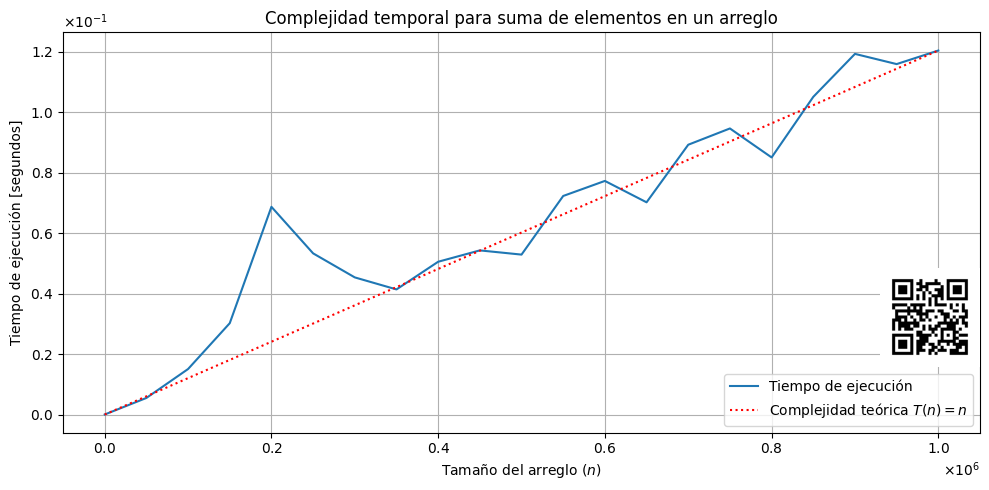

In [ ]:
# Lista de tamaños de lista para probar
tamanos_lista = np.arange(1, 1000101, 50000)

# Inicializar arrays para los tiempos de suma
tiempos_suma = np.zeros(len(tamanos_lista))

average = 100

# Medir el tiempo de suma 5 veces para cada tamaño de lista
for i, n in enumerate(tamanos_lista):
    tiempos_suma_n = np.zeros(average)
    for j in range(average):
        lista = np.random.randint(0, 1000, size=n)
        start_time = time.time()
        sumar_elementos(lista)
        end_time = time.time()
        tiempos_suma_n[j] = end_time - start_time
    tiempos_suma[i] = np.mean(tiempos_suma_n)

# Generar el código QR
qr_data = "https://bit.ly/3V6GBAl"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path)

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Graficar los resultados
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Gráfica: Tiempo de suma de elementos en un arreglo
ax1.plot(tamanos_lista, tiempos_suma, label='Tiempo de ejecución')

# Agregar la línea T(n) = O(n)
n_lineal = tamanos_lista
# Escalar n_lineal para ajustarse a la escala de tiempos_suma
n_lineal_scaled = n_lineal * (tiempos_suma[-1] / n_lineal[-1])
ax1.plot(tamanos_lista, n_lineal_scaled, label='Complejidad teórica $T(n) = n$', linestyle='dotted', color='red')

ax1.set_xlabel('Tamaño del arreglo ($n$)')
ax1.set_ylabel('Tiempo de ejecución [segundos]')
ax1.set_title('Complejidad temporal para suma de elementos en un arreglo')
ax1.legend(loc='lower right')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Insertar la imagen del código QR en la gráfica
qr_position = [0.885, 0.23, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('complejidad_temporal_lineal.png', dpi=300)